# Linear regression 

In this exercise you will use linear regression to predict flat prices. One more time, training will be handled via gradient descent. Although, contratry to the first exercise, we will now:
* have multiple features (i.e. variables used to make the prediction),
* employ some basic feature engineering,
* work with a different loss function.

Let's start with getting the data.

In [1]:
%matplotlib inline

!wget -O mieszkania.csv https://www.dropbox.com/s/zey0gx91pna8irj/mieszkania.csv?dl=1
!wget -O mieszkania_test.csv https://www.dropbox.com/s/dbrj6sbxb4ayqjz/mieszkania_test.csv?dl=1

--2017-11-03 20:50:57--  https://www.dropbox.com/s/zey0gx91pna8irj/mieszkania.csv?dl=1
Translacja www.dropbox.com (www.dropbox.com)... 162.125.66.1, 2620:100:6022:1::a27d:4201
Łączenie się z www.dropbox.com (www.dropbox.com)|162.125.66.1|:443... połączono.
Żądanie HTTP wysłano, oczekiwanie na odpowiedź... 302 Found
Lokalizacja: https://dl.dropboxusercontent.com/content_link/Yv4VFuPYeMSovTiCSRDMyKa9fzq0Tq4yQyufVn5VxjX9lwOkrT3WzyEtPCRwSBmm/file?dl=1 [podążanie]
--2017-11-03 20:50:57--  https://dl.dropboxusercontent.com/content_link/Yv4VFuPYeMSovTiCSRDMyKa9fzq0Tq4yQyufVn5VxjX9lwOkrT3WzyEtPCRwSBmm/file?dl=1
Translacja dl.dropboxusercontent.com (dl.dropboxusercontent.com)... 162.125.66.6, 2620:100:6022:6::a27d:4206
Łączenie się z dl.dropboxusercontent.com (dl.dropboxusercontent.com)|162.125.66.6|:443... połączono.
Żądanie HTTP wysłano, oczekiwanie na odpowiedź... 200 OK
Długość: 6211 (6,1K) [application/binary]
Zapis do: `mieszkania.csv'

mieszkania.csv      100%[===================>]   6,0

In [2]:
!head mieszkania.csv mieszkania_test.csv

==> mieszkania.csv <==
m2,dzielnica,ilość_sypialni,ilość_łazienek,rok_budowy,parking_podziemny,cena
104,mokotowo,2,2,1940,1,780094
43,ochotowo,1,1,1970,1,346912
128,grodziskowo,3,2,1916,1,523466
112,mokotowo,3,2,1920,1,830965
149,mokotowo,3,3,1977,0,1090479
80,ochotowo,2,2,1937,0,599060
58,ochotowo,2,1,1922,0,463639
23,ochotowo,1,1,1929,0,166785
40,mokotowo,1,1,1973,0,318849

==> mieszkania_test.csv <==
m2,dzielnica,ilość_sypialni,ilość_łazienek,rok_budowy,parking_podziemny,cena
71,wolowo,2,2,1912,1,322227
45,mokotowo,1,1,1938,0,295878
38,mokotowo,1,1,1999,1,306530
70,ochotowo,2,2,1980,1,553641
136,mokotowo,3,2,1939,1,985348
128,wolowo,3,2,1983,1,695726
23,grodziskowo,1,1,1975,0,99751
117,mokotowo,3,2,1942,0,891261
65,ochotowo,2,1,2002,1,536499


Each row in the data represents a separate property. Our goal is to use the data from `mieszkania.csv` to create a model that can predict a property's price (i.e. `cena`) given its features (i.e. `m2,dzielnica,ilość_sypialni,ilość_łazienek,rok_budowy,parking_podziemny`). 

From now on, we should interfere only with `mieszkania.csv` (dubbed the training dataset) to make our decisions and create the model. The (only) purpose of `mieszkania_test.csv` is to test our model on **unseen** data.

Our predictions should minimize the so-called mean squared logarithmic error:
$$
MSLE = \frac{1}{n} \sum_{i=1}^n (\log(1+y_i) - \log(1+p_i))^2,
$$
where $y_i$ is the ground truth, and $p_i$ is our prediction.

Let's start with implementing the loss function.

In [3]:
import math

def msle(ys, ps):
    """
    Mean squared logarithmic error.
    :param ys: ground truth prices
    :param ps: prediction prices
    """
    assert len(ys) == len(ps)
    return sum((math.log(1 + y_i) - math.log(1 + p_i)) ** 2 for y_i, p_i in zip(ys, ps)) / len(ys)

def l2_loss(ys, ps):
    """
    Least square error.
    :param ys: ground truth prices
    :param ps: prediction prices
    """
    # quicker solution
    # return np.linalg.norm(y - x) / len(ys)
    return math.sqrt(sum((y - x) ** 2 for x, y in zip(ys, ps)) / len(ys))

The simplest model is predicting the same constant for each instance. Test your implementation of msle against outputing the mean price.

In [4]:
import pandas
import numpy as np
import scipy.stats.mstats


def get_dataset(path):
    with open(path) as flats:
        data = pandas.read_csv(flats)
    #data = data.sample(frac=1)
    return data

def get_training_dataset():
    data_path = 'mieszkania.csv'
    return get_dataset(data_path)

dataset = get_training_dataset()

def get_testing_dataset():
    data_path = 'mieszkania_test.csv'
    return get_dataset(data_path)

def get_mean_price():
    return np.mean(dataset['cena'])

ys = dataset['cena']
ps = [get_mean_price()] * len(ys)

print(msle(ys, ps))
print(l2_loss(ys, ps))

0.3915253538257009
271680.69772714784


Recall that outputing the mean minimzes $MSE$. However, we're now dealing with $MSLE$.

Think of a constant that should result in the lowest $MSLE$.

In [5]:
def get_geometric_mean_price():
    return scipy.stats.mstats.gmean(dataset['cena'])

ps = [get_geometric_mean_price()] * len(ys)

print(msle(ys, ps))
print(l2_loss(ys, ps))

0.36488961221361227
282241.4511487305


In [6]:
def get_districts_set():
    return frozenset(dataset['dzielnica'])

districts = get_districts_set()

print(districts)

frozenset({'grodziskowo', 'wolowo', 'ochotowo', 'mokotowo'})


Now, let's implement a standard linear regression model. 

Let's make some features

In [9]:
lr = 0.0001 # step size
n_epoch = 1000 # number of passes over training data

def get_features(data=dataset):
    m2 = [item / 200 for item in data['m2']]
    bedrooms = data['ilość_sypialni']
    bathrooms = data['ilość_łazienek']
    construction_year = [(2017 - year) / 100 for year in data['rok_budowy']]
    parking_lot = data['parking_podziemny']
    district_features = [np.array(np.array(data['dzielnica']) == np.array(district), dtype=float) for district in districts]

    area_data = dataset.get(['m2', 'cena', 'dzielnica'])
    area_data['cena'] /= area_data['m2']
    average_district_prices_per_meter = area_data.groupby('dzielnica')['cena'].mean()

    average_meter_price_feature = [area * average_district_prices_per_meter[district] for area, district in 
                                  zip(data['m2'], data['dzielnica'])]
    average_meter_price_feature /= np.mean(average_meter_price_feature)

    #features
    xs = np.array([m2, bedrooms, bathrooms, construction_year, parking_lot] + district_features + 
                  [average_meter_price_feature]).T
    return xs

xs = get_features(dataset)

prices = dataset['cena']
print(xs.shape)

features_number = xs.shape[1]

# initial_weights
weights = np.zeros(features_number + 1)


(200, 10)


/home/michal/Pulpit/jnp_ml/mlenv/lib/python3.5/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


In [10]:
def predict_one(w, x):
    return x.dot(w[:-1]) + w[-1]

def predict(w, xs=xs):
    results = list()
    for item in xs:
        results.append(predict_one(w, item))
    return results

def evaluate(w, xs=xs, ys=ys, evaluation_function=l2_loss):
    return evaluation_function(ys, predict(w, xs))

losses = list()

def derivatives_one_point(ind, w):
    x = xs[ind]
    prediction = predict_one(w, x)
    #const_factor = -2 * (math.log(1 + prices[ind]) - math.log(1 + prediction)) / (1 + prediction)
    const_factor = 2 * (prediction - prices[ind])
    result = np.append(np.array(x), [1]) * const_factor
    return result

for i in range(n_epoch):
    loss = evaluate(weights)
    losses.append(loss)
    derivatives = np.array(sum(derivatives_one_point(ind, weights) for ind in range(len(xs))))
    weights = weights - lr * derivatives
    print('Iter: {:>3} Loss: {:8.8f}'.format(i, loss))


Iter:   0 Loss: 576014.41808289
Iter:   1 Loss: 353962.17814377
Iter:   2 Loss: 234792.79423946
Iter:   3 Loss: 176432.88421289
Iter:   4 Loss: 150874.95399924
Iter:   5 Loss: 140344.72577251
Iter:   6 Loss: 135756.48243276
Iter:   7 Loss: 133334.70371540
Iter:   8 Loss: 131682.98278117
Iter:   9 Loss: 130309.81636878
Iter:  10 Loss: 129045.29231257
Iter:  11 Loss: 127830.94429377
Iter:  12 Loss: 126646.58348243
Iter:  13 Loss: 125485.12769446
Iter:  14 Loss: 124343.97879908
Iter:  15 Loss: 123222.07336105
Iter:  16 Loss: 122118.87436154
Iter:  17 Loss: 121034.02656772
Iter:  18 Loss: 119967.23873540
Iter:  19 Loss: 118918.24333160
Iter:  20 Loss: 117886.78274755
Iter:  21 Loss: 116872.60456404
Iter:  22 Loss: 115875.45991030
Iter:  23 Loss: 114895.10288059
Iter:  24 Loss: 113931.29031294
Iter:  25 Loss: 112983.78169226
Iter:  26 Loss: 112052.33909681
Iter:  27 Loss: 111136.72716012
Iter:  28 Loss: 110236.71303900
Iter:  29 Loss: 109352.06638427
Iter:  30 Loss: 108482.55931323
Iter:  3

Iter: 275 Loss: 57666.84455411
Iter: 276 Loss: 57623.92953360
Iter: 277 Loss: 57581.16583295
Iter: 278 Loss: 57538.55155626
Iter: 279 Loss: 57496.08484688
Iter: 280 Loss: 57453.76388649
Iter: 281 Loss: 57411.58689422
Iter: 282 Loss: 57369.55212578
Iter: 283 Loss: 57327.65787263
Iter: 284 Loss: 57285.90246114
Iter: 285 Loss: 57244.28425181
Iter: 286 Loss: 57202.80163846
Iter: 287 Loss: 57161.45304750
Iter: 288 Loss: 57120.23693715
Iter: 289 Loss: 57079.15179670
Iter: 290 Loss: 57038.19614586
Iter: 291 Loss: 56997.36853401
Iter: 292 Loss: 56956.66753952
Iter: 293 Loss: 56916.09176912
Iter: 294 Loss: 56875.63985724
Iter: 295 Loss: 56835.31046537
Iter: 296 Loss: 56795.10228144
Iter: 297 Loss: 56755.01401925
Iter: 298 Loss: 56715.04441782
Iter: 299 Loss: 56675.19224089
Iter: 300 Loss: 56635.45627631
Iter: 301 Loss: 56595.83533550
Iter: 302 Loss: 56556.32825295
Iter: 303 Loss: 56516.93388563
Iter: 304 Loss: 56477.65111255
Iter: 305 Loss: 56438.47883423
Iter: 306 Loss: 56399.41597223
Iter: 30

Iter: 553 Loss: 48851.06131361
Iter: 554 Loss: 48826.54048088
Iter: 555 Loss: 48802.05737141
Iter: 556 Loss: 48777.61189954
Iter: 557 Loss: 48753.20397994
Iter: 558 Loss: 48728.83352768
Iter: 559 Loss: 48704.50045816
Iter: 560 Loss: 48680.20468716
Iter: 561 Loss: 48655.94613077
Iter: 562 Loss: 48631.72470548
Iter: 563 Loss: 48607.54032810
Iter: 564 Loss: 48583.39291578
Iter: 565 Loss: 48559.28238602
Iter: 566 Loss: 48535.20865667
Iter: 567 Loss: 48511.17164590
Iter: 568 Loss: 48487.17127221
Iter: 569 Loss: 48463.20745445
Iter: 570 Loss: 48439.28011178
Iter: 571 Loss: 48415.38916370
Iter: 572 Loss: 48391.53453002
Iter: 573 Loss: 48367.71613090
Iter: 574 Loss: 48343.93388677
Iter: 575 Loss: 48320.18771842
Iter: 576 Loss: 48296.47754694
Iter: 577 Loss: 48272.80329373
Iter: 578 Loss: 48249.16488049
Iter: 579 Loss: 48225.56222925
Iter: 580 Loss: 48201.99526232
Iter: 581 Loss: 48178.46390234
Iter: 582 Loss: 48154.96807222
Iter: 583 Loss: 48131.50769520
Iter: 584 Loss: 48108.08269480
Iter: 58

Iter: 850 Loss: 42937.85235585
Iter: 851 Loss: 42921.80431073
Iter: 852 Loss: 42905.77795452
Iter: 853 Loss: 42889.77325286
Iter: 854 Loss: 42873.79017144
Iter: 855 Loss: 42857.82867607
Iter: 856 Loss: 42841.88873263
Iter: 857 Loss: 42825.97030705
Iter: 858 Loss: 42810.07336540
Iter: 859 Loss: 42794.19787378
Iter: 860 Loss: 42778.34379840
Iter: 861 Loss: 42762.51110554
Iter: 862 Loss: 42746.69976157
Iter: 863 Loss: 42730.90973292
Iter: 864 Loss: 42715.14098612
Iter: 865 Loss: 42699.39348778
Iter: 866 Loss: 42683.66720457
Iter: 867 Loss: 42667.96210327
Iter: 868 Loss: 42652.27815070
Iter: 869 Loss: 42636.61531379
Iter: 870 Loss: 42620.97355954
Iter: 871 Loss: 42605.35285502
Iter: 872 Loss: 42589.75316739
Iter: 873 Loss: 42574.17446387
Iter: 874 Loss: 42558.61671177
Iter: 875 Loss: 42543.07987849
Iter: 876 Loss: 42527.56393147
Iter: 877 Loss: 42512.06883826
Iter: 878 Loss: 42496.59456648
Iter: 879 Loss: 42481.14108380
Iter: 880 Loss: 42465.70835801
Iter: 881 Loss: 42450.29635693
Iter: 88

In [11]:
from sklearn.linear_model import LinearRegression
import numpy as np

X = xs
regr = LinearRegression()
regr.fit(X, ys) # training

sk_loss = l2_loss(ys, regr.predict(X))
print(regr.coef_, regr.intercept_)
print(sk_loss)

scikit_weights = np.array(list(regr.coef_) + [regr.intercept_])

[-367451.19886498    7290.25294817   -4756.57809014   -3739.27592589
   15048.55808384   23779.34531024    5386.42972043  -11285.57206654
  -17880.20296413  625738.35383846] 17620.4898697
28160.772915379373


Let's check the predictions

In [12]:
for price, prediction in zip(ys, predict(weights, xs)):
    print(price, prediction)

780094 751150.010182
346912 343738.232692
523466 594492.001368
830965 847338.089632
1090479 1062422.59807
599060 612788.478439
463639 461703.68845
166785 215229.255554
318849 301574.240057
1011395 973353.150506
429462 367234.484983
1051608 976099.33839
563473 575556.691121
620449 666912.17194
1097777 1044719.91622
645200 630179.253915
776122 762420.319224
367862 354860.098749
257190 186705.850138
1010002 1018498.77269
381594 393248.555349
980560 932585.623276
291748 260012.627105
788216 690448.447463
1064711 1055644.18877
758000 733887.279267
652028 701726.725559
515061 518737.56821
505024 529172.598402
479861 577126.399291
550903 658910.698845
112635 85023.1230775
291166 263941.475846
128308 199289.842956
629152 641069.047258
482861 459377.939055
330775 306803.921586
453511 434683.468869
232030 230206.497352
392325 447299.960101
306354 284754.866789
922621 910066.727249
452189 456052.564093
994035 957497.892618
488394 491848.435647
384485 382590.813303
105554 170763.898011
496032 5126

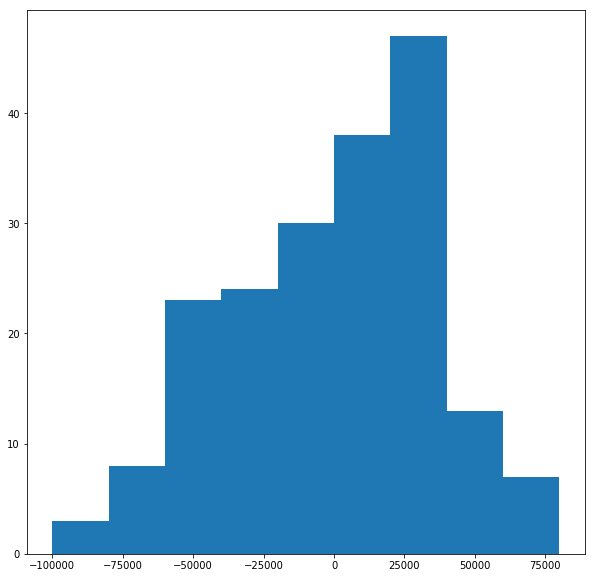

In [23]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
plt.hist(ys - predict(weights, xs), bins=range(-100000, 100000, 20000))
plt.show()

### TODO
* Perform normalization/scaling of the data.
* Scikit-learn implementation
* Permutation of data
* !!! separation of testing and training data
* To obtain a feature from the district make it binary (yes/no)

Note that the loss function that the algorithms optimizes (i.e $MSE$) differs from $MSLE$. We've already seen that this may result in a suboptimal solution.

How can you change the setting so that we optimze $MSLE$ instead?

Hint: 
<sub><sup><sub><sup><sub><sup>
Be lazy. We don't want to change algorithm.
</sup></sub></sup></sub></sup></sub>

In [ ]:
#############################################
# TODO: Optimize msle and compare the error #
#############################################

Without any feature engineering our model approximates the price as a linear combination of original features:
$$
\text{price} \approx w_1 \cdot \text{area} + w_2 \cdot \text{district} + \dots.
$$
Let's now introduce some interactions between the variables. For instance, let's consider a following formula:
$$
\text{price} \approx w_1 \cdot \text{area} \cdot \text{avg. price in the district per sq. meter} + w_2 \cdot \dots + \dots.
$$
Here, we model the price with far greater granularity, and we may expect to see more acurate results.

Add some feature engineering to your model. Be sure to play with the data and not with the algorithm's code. 

Think how to make sure that your model is capable of capturing the $w_1 \cdot \text{area} \cdot \text{avg. price...}$ part, without actually computing the averages.

Hint: 
<sub><sup><sub><sup><sub><sup>
Is having a binary encoding for each district and multiplying it by area enough?
</sup></sub></sup></sub></sup></sub>

Hint 2: 
<sub><sup><sub><sup><sub><sup>
Why not multiply everything together? I.e. (A,B,C) -> (AB,AC,BC).
</sup></sub></sup></sub></sup></sub>

Let's plot the weights

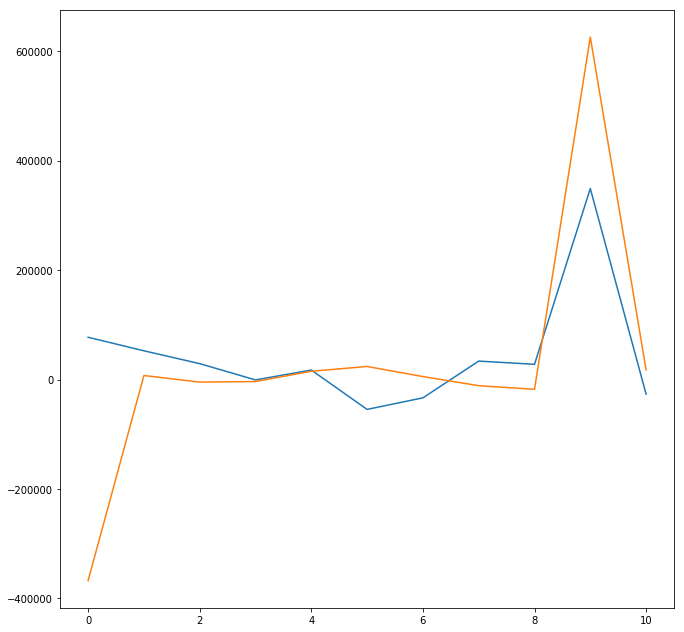

In [27]:
plt.figure(figsize=(11, 11))
plt.plot(weights)
plt.plot(scikit_weights)
plt.show()

In [28]:
testing_set = get_testing_dataset()
ys = testing_set['cena']
xs = get_features(testing_set)
print(evaluate(scikit_weights, xs, ys), 'Testing data loss score scikit solution')
print(evaluate(weights, xs, ys), 'Testing data loss score my solution')

80204.345088095 Testing data loss score scikit solution
60244.517388222404 Testing data loss score my solution


/home/michal/Pulpit/jnp_ml/mlenv/lib/python3.5/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


# Questions
* Problems with MSLE
* regularization

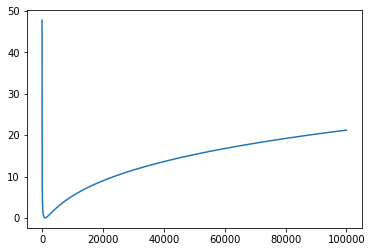

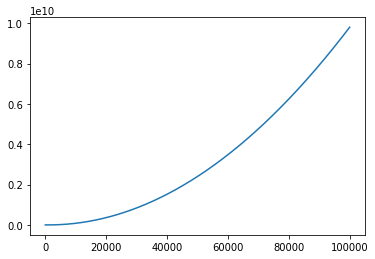

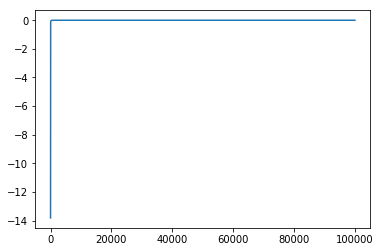

In [14]:
import matplotlib.pyplot as plt
import math

def msle(p, y):
    return (math.log(1 + y) - math.log(1 + p)) ** 2

def l2(p, y):
    return (p - y) ** 2

y = 1000
x = range(0, 100000, 10)

plt.plot(x, [msle(x_i, y) for x_i in x])
plt.show()
plt.plot(x, [l2(x_i, y) for x_i in x])
plt.show()

ps = [-2 * (math.log(1 + y) - math.log(1 + x_i)) / (1 + x_i) for x_i in x]
plt.plot(x, ps)
plt.show()